# Análise de Clusters
### Base de dados: Mental Health and Technology Usage
#### Grupo: Marcos Rodrigues, Raphael Alcantara, Luis Felipe Nogeuira, Victor Nogueira

## Variáveis: 

- User_ID: Código do respondente
- Age: Idade do respondente
- Gender: Genêro (Female, Male, Other)
- Tecnology_Usage_Hours: Uso de tecnologia diária em horas por dia
- Gaming_Hours: Tempo em horas de "gameplay" por dia
- Screen_Time_Hours: Tempo em horas de uso de tela por dia
- Mental_Health_Status: Status da saúde mental (Excellent, Good, Fair, Poor)
- Stress_Level: Nível de estresse (Medium, Low, High)
- Sleep_Hours: Tempo de sono em horas por dia
- Physical_Activity_Hours: Tempo de atividade física em horas por dia
- Support_Systems_Access: Se há acesso à sistemas de suporte (Yes, No)
- Work_Environment_Impact: Impacto envolvido no ambiente de trabalho (Negative, Neutral, Positive)
- Online_Support_Usage: Uso de suporte online (Yes, No

#### Esse conjunto de dados oferece insights sobre como o uso diário da tecnologia, incluindo mídias sociais e tempo de tela, afeta a saúde mental. Ele captura vários padrões comportamentais e suas correlações com indicadores de saúde mental, como níveis de estresse, qualidade do sono e produtividade.

A análise de cluster nessa etapa foi aplicada com o objetivo de identificar padrões de comportamento entre os respondentes com base em variáveis relacionadas ao uso de tecnologia, hábitos de sono e atividade física. As variáveis utilizadas no agrupamento foram: Age, Technology_Usage_Hours, Social_Media_Usage_Hours, Gaming_Hours, Screen_Time_Hours, Sleep_Hours e Physical_Activity_Hours.

Foram testadas segmentações com 5, 7 e 10 grupos, permitindo observar diferentes níveis de granularidade nos perfis comportamentais extraídos da base de dados. Este tipo de análise não supervisionada possibilita agrupar indivíduos com características similares sem a necessidade de uma variável-alvo, sendo útil para a exploração de perfis distintos dentro da população analisada.









In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import numpy as np
import scipy as sp
from scipy import stats as st
import researchpy as rs
from scipy.spatial import distance_matrix
from scipy.spatial import distance
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels as stm
import os

### Importando e Observando os Dados

In [ ]:
df = pd.read_csv('mental_health_and_technology_usage_2024.csv')

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.columns

Index(['User_ID', 'Age', 'Gender', 'Technology_Usage_Hours',
       'Social_Media_Usage_Hours', 'Gaming_Hours', 'Screen_Time_Hours',
       'Mental_Health_Status', 'Stress_Level', 'Sleep_Hours',
       'Physical_Activity_Hours', 'Support_Systems_Access',
       'Work_Environment_Impact', 'Online_Support_Usage'],
      dtype='object')

In [ ]:
df.head()

,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,USER-00001,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes
1,USER-00002,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No
2,USER-00003,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,9.81,No,Negative,No
3,USER-00004,25,Female,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,5.28,Yes,Negative,Yes
4,USER-00005,53,Male,1.20,0.56,0.29,12.63,Good,Low,5.55,4.00,No,Positive,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User_ID                   10000 non-null  object 
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Technology_Usage_Hours    10000 non-null  float64
 4   Social_Media_Usage_Hours  10000 non-null  float64
 5   Gaming_Hours              10000 non-null  float64
 6   Screen_Time_Hours         10000 non-null  float64
 7   Mental_Health_Status      10000 non-null  object 
 8   Stress_Level              10000 non-null  object 
 9   Sleep_Hours               10000 non-null  float64
 10  Physical_Activity_Hours   10000 non-null  float64
 11  Support_Systems_Access    10000 non-null  object 
 12  Work_Environment_Impact   10000 non-null  object 
 13  Online_Support_Usage      10000 non-null  object 
dtypes: floa

#### Análise descritiva Geral

In [ ]:
df.describe()

,Age,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Sleep_Hours,Physical_Activity_Hours
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,41.518600,6.474341,3.972321,2.515598,7.975765,6.500724,5.003860
std,13.920217,3.169022,2.313707,1.446748,4.042608,1.450933,2.905044
min,18.000000,1.000000,0.000000,0.000000,1.000000,4.000000,0.000000
25%,29.000000,3.760000,1.980000,1.260000,4.520000,5.260000,2.490000
50%,42.000000,6.425000,3.950000,2.520000,7.900000,6.500000,4.990000
75%,54.000000,9.212500,5.990000,3.790000,11.500000,7.760000,7.540000
max,65.000000,12.000000,8.000000,5.000000,15.000000,9.000000,10.000000


### Análise de Clusters

In [ ]:
# Variáveis
variaveis = ['Age', 'Technology_Usage_Hours', 'Social_Media_Usage_Hours', 
             'Gaming_Hours', 'Screen_Time_Hours', 'Sleep_Hours', 'Physical_Activity_Hours']

In [ ]:
df.idxmax()

User_ID                     9999
Age                          184
Gender                         8
Technology_Usage_Hours      2311
Social_Media_Usage_Hours    2293
Gaming_Hours                 405
Screen_Time_Hours           1063
Mental_Health_Status           1
Stress_Level                   3
Sleep_Hours                 1568
Physical_Activity_Hours      684
Support_Systems_Access         1
Work_Environment_Impact        1
Online_Support_Usage           0
dtype: int64

### Padronização de Variáveis

In [ ]:
z_variaveis = []
for var in variaveis:
    z_variaveis.append("z_" + var)

In [ ]:
X = df[variaveis]
X_std = StandardScaler().fit_transform(X)

In [ ]:
# Concatenando as variáveis padronizadas no dataframe
df = pd.concat([df, pd.DataFrame(X_std, columns=z_variaveis)], axis=1)

In [ ]:
df.head()

,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,...,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage,z_Age,z_Technology_Usage_Hours,z_Social_Media_Usage_Hours,z_Gaming_Hours,z_Screen_Time_Hours,z_Sleep_Hours,z_Physical_Activity_Hours
0,USER-00001,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,...,No,Negative,Yes,-1.330405,0.030187,0.876421,-1.268838,1.084561,1.040263,0.587332
1,USER-00002,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,...,Yes,Positive,No,-1.474088,-1.093244,-0.606123,0.846355,-0.090482,0.537113,0.301608
2,USER-00003,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,...,No,Negative,No,0.681159,-1.083777,0.936933,-0.867919,-1.191312,1.060940,1.654495
3,USER-00004,25,Female,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,...,Yes,Negative,Yes,-1.186722,-0.831320,0.219433,0.051430,1.262673,-0.607036,0.095060
4,USER-00005,53,Male,1.20,0.56,0.29,12.63,Good,Low,5.55,...,No,Positive,Yes,0.824842,-1.664426,-1.474902,-1.538422,1.151353,-0.655283,-0.345575


Inicialmente, realizamos a padronização das variáveis pois elas possuem variabilidadea diferentes, o que poderia afetar a formação dos clusters, devido a maior amplitude de alguma das variáveis. Sendo assim, o método escolhido para a padronização foi o Z score e a partir dela, as variáveis passam a possuir o mesmo peso dentro da análise.

### Matriz de distancia "Euclidiana Quadrática"

In [ ]:
# Distancia Euclidiana
distance.cdist(df[variaveis], 
               df[variaveis], 'sqeuclidean')

array([[  0.    ,  61.5864, 891.0678, ...,  43.6194, 279.7988, 368.8379],
       [ 61.5864,   0.    , 954.7212, ...,  26.7216, 345.8902, 426.5769],
       [891.0678, 954.7212,   0.    , ..., 859.3462, 371.0934, 169.1177],
       ...,
       [ 43.6194,  26.7216, 859.3462, ...,   0.    , 277.2422, 342.5307],
       [279.7988, 345.8902, 371.0934, ..., 277.2422,   0.    ,  74.3759],
       [368.8379, 426.5769, 169.1177, ..., 342.5307,  74.3759,   0.    ]])

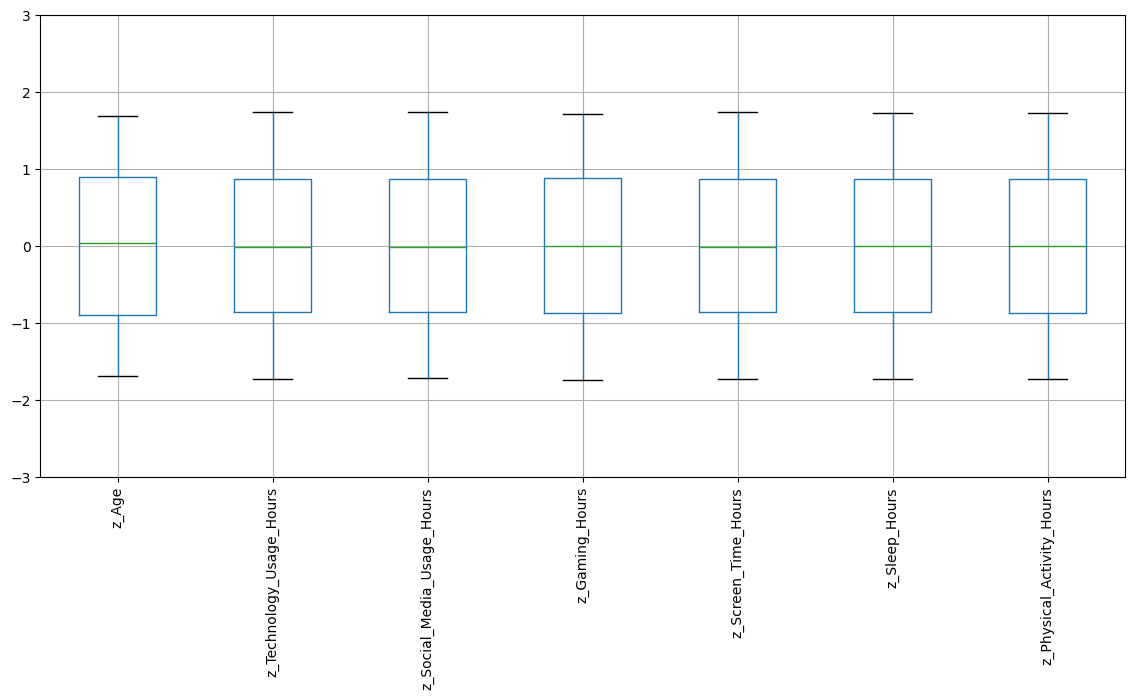

In [ ]:
# Outlier Univariado
df[z_variaveis].boxplot(rot=90,figsize=[14,6])
plt.ylim(-3,3)
plt.show()

A matriz de distância, que foi calculada usando a distância euclidiana quadrática, mostra que existe uma boa variação nas similaridades entre os dados do conjunto. Isso é ótimo pra análise de cluster, porque essa diversidade ajuda a encontrar grupos naturais dentro do conjunto. Como as distâncias variam bastante, tem uma boa chance de identificar clusters bem definidos. Além disso, o uso da distância euclidiana faz sentido aqui, já que os dados foram padronizados com z-score, o que garante uma comparação mais justa entre as variáveis.

### D2 de Mahalanobis 

In [ ]:
# Média e matriz de covariância
mean_vector = X.mean().values
cov_matrix = np.cov(X.values, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

In [ ]:
# Outlier multivariado D2 de mahalanobis
# Regra do número de variáveis vezes 2.5 (se maior, outlier) no caso, 17.5

# Função para calcular o D² de Mahalanobis (sem raiz)
def mahalanobis_d2(row, mean_vector, inv_cov_matrix):
    diff = row - mean_vector
    return np.dot(np.dot(diff, inv_cov_matrix), diff.T)

In [ ]:
# Calcula a distância de D2Mahalanobis para cada um dos casos.
df['mahalanobis_d2'] = X.apply(lambda row: mahalanobis_d2(row.values, mean_vector, inv_cov_matrix), axis=1)
df.head()

,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,...,Work_Environment_Impact,Online_Support_Usage,z_Age,z_Technology_Usage_Hours,z_Social_Media_Usage_Hours,z_Gaming_Hours,z_Screen_Time_Hours,z_Sleep_Hours,z_Physical_Activity_Hours,mahalanobis_d2
0,USER-00001,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,...,Negative,Yes,-1.330405,0.030187,0.876421,-1.268838,1.084561,1.040263,0.587332,6.790576
1,USER-00002,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,...,Positive,No,-1.474088,-1.093244,-0.606123,0.846355,-0.090482,0.537113,0.301608,4.768009
2,USER-00003,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,...,Negative,No,0.681159,-1.083777,0.936933,-0.867919,-1.191312,1.060940,1.654495,8.751142
3,USER-00004,25,Female,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,...,Negative,Yes,-1.186722,-0.831320,0.219433,0.051430,1.262673,-0.607036,0.095060,4.139608
4,USER-00005,53,Male,1.20,0.56,0.29,12.63,Good,Low,5.55,...,Positive,Yes,0.824842,-1.664426,-1.474902,-1.538422,1.151353,-0.655283,-0.345575,9.690050


In [ ]:
# Os casos mais distantes da média. Os mais diferentes.

# Não há observações outliers de acordo com o D2 de mahalanobis
df.loc[df['mahalanobis_d2'] > 17.5]

,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,...,Work_Environment_Impact,Online_Support_Usage,z_Age,z_Technology_Usage_Hours,z_Social_Media_Usage_Hours,z_Gaming_Hours,z_Screen_Time_Hours,z_Sleep_Hours,z_Physical_Activity_Hours,mahalanobis_d2


A partir da análise do D2 de Mahalanobis é possível dizer que nenhum dos casos da base de dados apresenta indícios para ser um outlier. Sendo assim, o indicado é prosseguir com a análise mantendo todos os casos nela, sem nenhum descarte.


### Método Hierárquico Aglomerativo

In [ ]:
Z = linkage(df[z_variaveis], method='complete', metric='sqeuclidean')

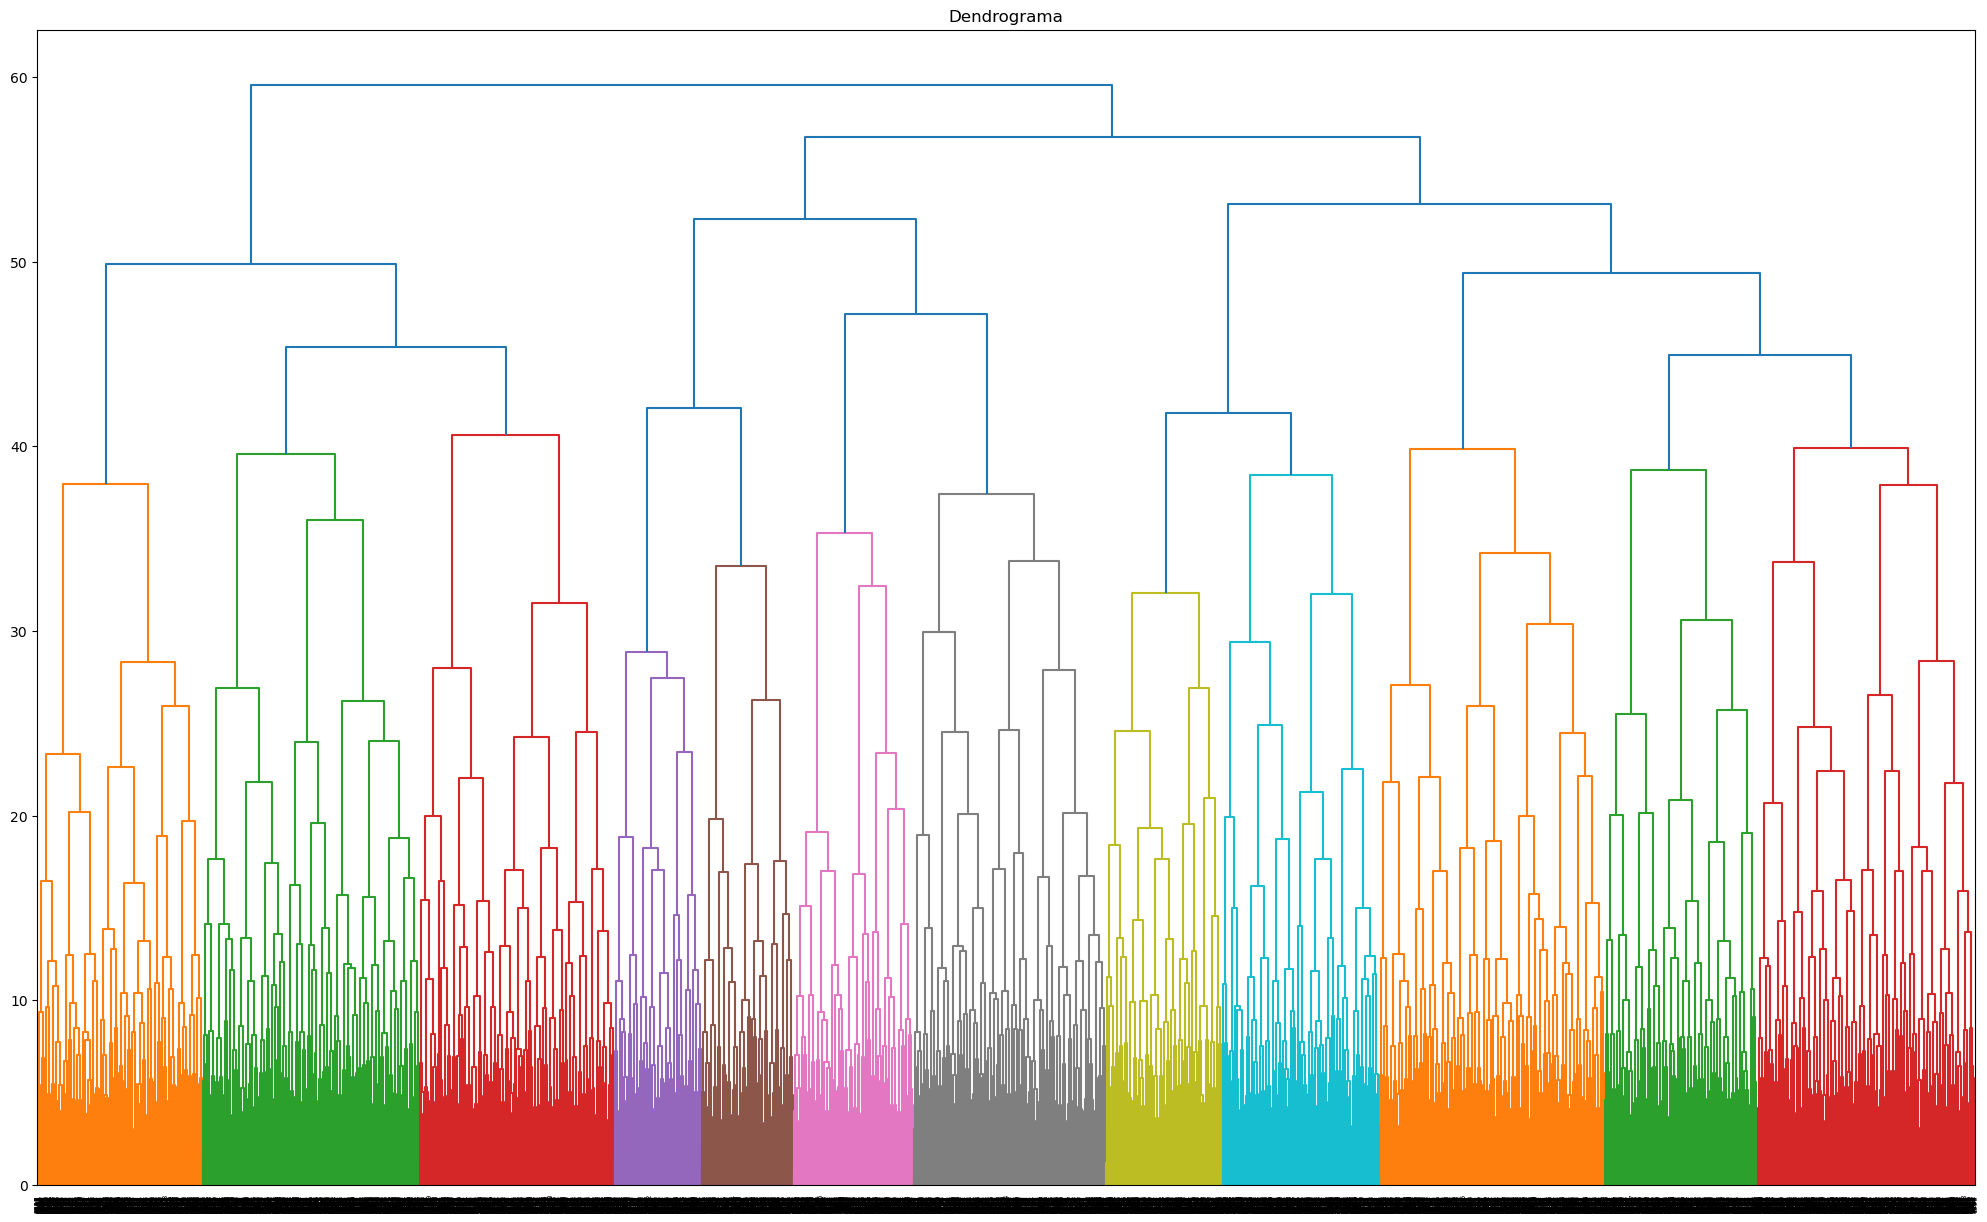

In [ ]:
fig = plt.figure(figsize=(25, 15))
dn = dendrogram(Z)
plt.title("Dendrograma") 
plt.show()

In [ ]:
# Transforma a matriz Z em um DataFrame. 
parada = pd.DataFrame(Z, columns=["c1", "c2", "dist", "n"])

In [ ]:
parada.head()

,c1,c2,dist,n
0,5104.0,8311.0,0.034745,2.0
1,2861.0,8655.0,0.042509,2.0
2,2502.0,7268.0,0.056106,2.0
3,893.0,7837.0,0.062762,2.0
4,2205.0,7401.0,0.080331,2.0


In [ ]:
parada.tail(20)

,c1,c2,dist,n
9979,19966.0,19975.0,37.403759,993.0
9980,19955.0,19963.0,37.906241,599.0
9981,19936.0,19962.0,37.977195,854.0
9982,19965.0,19970.0,38.461180,807.0
9983,19949.0,19968.0,38.745545,788.0
9984,19956.0,19978.0,39.568991,1121.0
9985,19958.0,19976.0,39.833939,1168.0
9986,19974.0,19980.0,39.934898,1120.0
9987,19961.0,19969.0,40.636855,1005.0
9988,19971.0,19982.0,41.819349,1407.0


In [ ]:
# Cálculo da heterogeneidade. É a variação percentual da distância do estágio posterior em relação ao estágio atual
parada['heterogeneidade'] = ((parada['dist'].shift(-1) - parada['dist']) / parada['dist']) * 100

In [ ]:
parada["qt_cluster"] = range(len(parada), 0, -1)

In [ ]:
# Exibição das últimas 10 linhas dos DataFrame. Os últimos 10 estágios do processo hierárquico aglomerativo.
parada.tail(20)

,c1,c2,dist,n,heterogeneidade,qt_cluster
9979,19966.0,19975.0,37.403759,993.0,1.343398,20
9980,19955.0,19963.0,37.906241,599.0,0.187182,19
9981,19936.0,19962.0,37.977195,854.0,1.274412,18
9982,19965.0,19970.0,38.461180,807.0,0.739354,17
9983,19949.0,19968.0,38.745545,788.0,2.125266,16
9984,19956.0,19978.0,39.568991,1121.0,0.669585,15
9985,19958.0,19976.0,39.833939,1168.0,0.253451,14
9986,19974.0,19980.0,39.934898,1120.0,1.757753,13
9987,19961.0,19969.0,40.636855,1005.0,2.909904,12
9988,19971.0,19982.0,41.819349,1407.0,0.621500,11


Observando a construção do dendrograma e o incremento de heterogeneidade na formação dos grupos finais, entendemos que 4 possibilidades poderiam ser observadas e testadas, para se encontrar o melhor número de clusters possível na busca de maior homogeneidade interna e maior heterogeneidade externa. As opções escolhidas foram em 3, 5, 7 e 10 grupos.

### 3 Grupos

In [ ]:
# Solução com 3 grupos, distância euclidiana quadrática e ligação completa (vizinho mais longe)
cluster = AgglomerativeClustering(n_clusters=3, metric='sqeuclidean', linkage='complete')  

In [ ]:
# Classificação de cada um dos 100 casos em um dos grupos (0,1 e 2)
cluster.fit_predict(df[z_variaveis])

array([1, 2, 2, ..., 1, 0, 2], dtype=int64)

In [ ]:
# Ajuste do agrupamento
cluster.fit(df[z_variaveis])

AgglomerativeClustering(linkage='complete', metric='sqeuclidean', n_clusters=3)

In [ ]:
# Parâmetros utilizados
cluster.get_params()

{'compute_distances': False,
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'complete',
 'memory': None,
 'metric': 'sqeuclidean',
 'n_clusters': 3}

In [ ]:
# Exibição dos grupos para cada um dos casos
cluster.labels_

array([1, 2, 2, ..., 1, 0, 2], dtype=int64)

In [ ]:
# Número de Casos
cluster.n_leaves_

10000

In [ ]:
# Número de clusters
cluster.n_clusters

3

In [ ]:
# Formação dos grupos - Aglomeração - Apresentação dos 5 primeiros passos.
cluster.children_[0:5]

array([[5104, 8311],
       [2861, 8655],
       [2502, 7268],
       [ 893, 7837],
       [2205, 7401]])

In [ ]:
# Acrescenta uma coluna no DataFrame informando em qual grupo cada indivíduo foi alocado
df = pd.concat([df, pd.DataFrame(cluster.fit_predict(df[z_variaveis]), columns=['grupo_3'])], axis=1)

In [ ]:
df.head(3)

,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,...,Online_Support_Usage,z_Age,z_Technology_Usage_Hours,z_Social_Media_Usage_Hours,z_Gaming_Hours,z_Screen_Time_Hours,z_Sleep_Hours,z_Physical_Activity_Hours,mahalanobis_d2,grupo_3
0,USER-00001,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,...,Yes,-1.330405,0.030187,0.876421,-1.268838,1.084561,1.040263,0.587332,6.790576,1
1,USER-00002,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,...,No,-1.474088,-1.093244,-0.606123,0.846355,-0.090482,0.537113,0.301608,4.768009,2
2,USER-00003,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,...,No,0.681159,-1.083777,0.936933,-0.867919,-1.191312,1.060940,1.654495,8.751142,2


In [ ]:
df.groupby('grupo_3').count()['User_ID']

grupo_3
0    4483
1    2980
2    2537
Name: User_ID, dtype: int64

In [ ]:
# Restringindo dataframe para apenas dados numericos
df_numerico = df.select_dtypes(include=['number'])

In [ ]:
# Calcula a média das variáveis utilizadas na segamentação por grupo e gera um DataFrame
grupo_3 = df_numerico.groupby('grupo_3').mean()[z_variaveis].round(2)

In [ ]:
grupo_3

,z_Age,z_Technology_Usage_Hours,z_Social_Media_Usage_Hours,z_Gaming_Hours,z_Screen_Time_Hours,z_Sleep_Hours,z_Physical_Activity_Hours
grupo_3,,,,,,,
0,0.55,0.34,-0.02,0.10,-0.03,0.02,-0.02
1,-0.82,0.06,0.32,0.32,-0.02,-0.06,-0.14
2,-0.00,-0.66,-0.34,-0.54,0.07,0.04,0.20


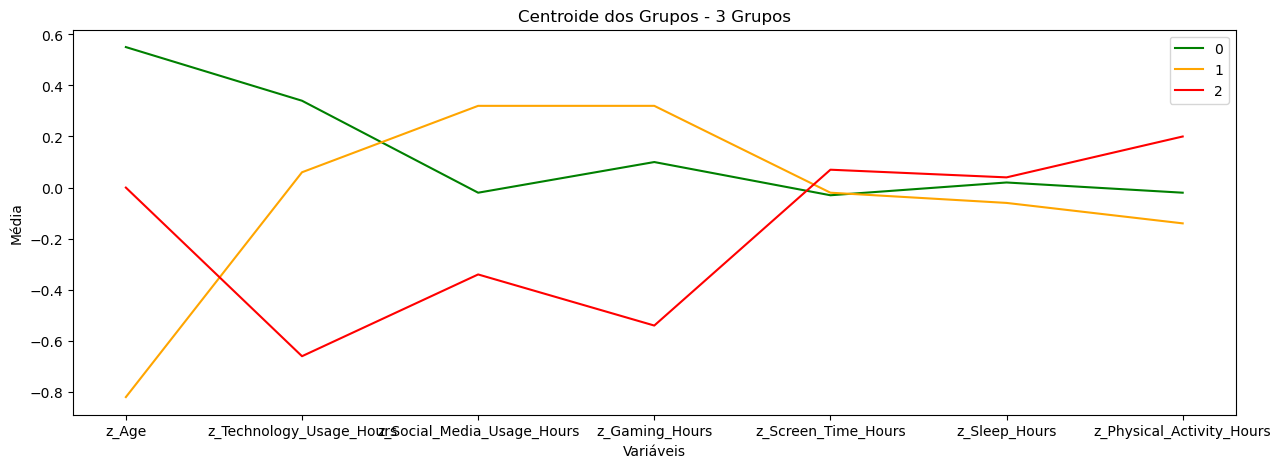

In [ ]:
# Gera um gráfico de linhas dos centros dos grupos
plt.figure(figsize=(15,5))
plt.plot(z_variaveis, grupo_3.loc[0], color='g')
plt.plot(z_variaveis, grupo_3.loc[1], color='orange')
plt.plot(z_variaveis, grupo_3.loc[2], color='red')
plt.xlabel('Variáveis')
plt.ylabel('Média')
plt.title('Centroide dos Grupos - 3 Grupos')
plt.legend(["0","1","2"], loc=1)
plt.show()

Avaliando em conjunto a distribuição dos indivíduos nos clusters, os centroides dos grupos e a quantidade padrão de casos por cluster (entre 5% e 10% do N), entendemos que este caso não é o mais adequado, visto que todos os clusters violam essa última condição, mesmo que a distribuição pelos clusters seja boa e os centroides mostrem que os comportamentos dos grupos são consideravelmente diferentes. Sendo assim, observamos que é possível encontrarmos uma opção melhor, com um maior número de clusterrs, o que melhoraria ainda, os índices de homogeneidade interna e heterogeneidade externa.

### 5 Grupos

In [ ]:
# Solução com 5 grupos, distância euclidiana quadrática e ligação completa (vizinho mais longe)
cluster = AgglomerativeClustering(n_clusters=5, metric='sqeuclidean', linkage='complete')  

In [ ]:
# Classificação de cada um dos 100 casos em um dos grupos (0,1 e 2)
cluster.fit_predict(df[z_variaveis])

array([0, 4, 4, ..., 0, 3, 1], dtype=int64)

In [ ]:
# Ajuste do agrupamento
cluster.fit(df[z_variaveis])

AgglomerativeClustering(linkage='complete', metric='sqeuclidean', n_clusters=5)

In [ ]:
# Parâmetros utilizados
cluster.get_params()

{'compute_distances': False,
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'complete',
 'memory': None,
 'metric': 'sqeuclidean',
 'n_clusters': 5}

In [ ]:
# Exibição dos grupos para cada um dos casos
cluster.labels_

array([0, 4, 4, ..., 0, 3, 1], dtype=int64)

In [ ]:
# Número de Casos
cluster.n_leaves_

10000

In [ ]:
# Número de clusters
cluster.n_clusters

5

In [ ]:
# Formação dos grupos - Aglomeração - Apresentação dos 5 primeiros passos.
cluster.children_[0:5]

array([[5104, 8311],
       [2861, 8655],
       [2502, 7268],
       [ 893, 7837],
       [2205, 7401]])

In [ ]:
# Acerescenta uma coluna no DataFrame informando em qual grupo cada indivíduo foi alocado
df = pd.concat([df, pd.DataFrame(cluster.fit_predict(df[z_variaveis]), columns=['grupo_5'])], axis=1)

In [ ]:
df.head(3)

,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,...,z_Age,z_Technology_Usage_Hours,z_Social_Media_Usage_Hours,z_Gaming_Hours,z_Screen_Time_Hours,z_Sleep_Hours,z_Physical_Activity_Hours,mahalanobis_d2,grupo_3,grupo_5
0,USER-00001,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,...,-1.330405,0.030187,0.876421,-1.268838,1.084561,1.040263,0.587332,6.790576,1,0
1,USER-00002,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,...,-1.474088,-1.093244,-0.606123,0.846355,-0.090482,0.537113,0.301608,4.768009,2,4
2,USER-00003,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,...,0.681159,-1.083777,0.936933,-0.867919,-1.191312,1.060940,1.654495,8.751142,2,4


In [ ]:
df.groupby('grupo_5').count()['User_ID']

grupo_5
0    2980
1    1613
2    3076
3    1407
4     924
Name: User_ID, dtype: int64

In [ ]:
# Restringindo dataframe para apenas dados numericos
df_numerico = df.select_dtypes(include=['number'])

In [ ]:
# Calcula a média das variáveis utilizadas na segamentação por grupo e gera um DataFrame
grupo_5 = df_numerico.groupby('grupo_5').mean()[z_variaveis].round(2)

In [ ]:
grupo_5

,z_Age,z_Technology_Usage_Hours,z_Social_Media_Usage_Hours,z_Gaming_Hours,z_Screen_Time_Hours,z_Sleep_Hours,z_Physical_Activity_Hours
grupo_5,,,,,,,
0,-0.82,0.06,0.32,0.32,-0.02,-0.06,-0.14
1,-0.09,-0.53,-0.45,-0.83,0.34,-0.25,-0.22
2,0.43,0.64,-0.02,-0.09,-0.02,0.17,0.30
3,0.79,-0.32,-0.03,0.51,-0.03,-0.32,-0.73
4,0.14,-0.89,-0.14,-0.05,-0.39,0.54,0.92


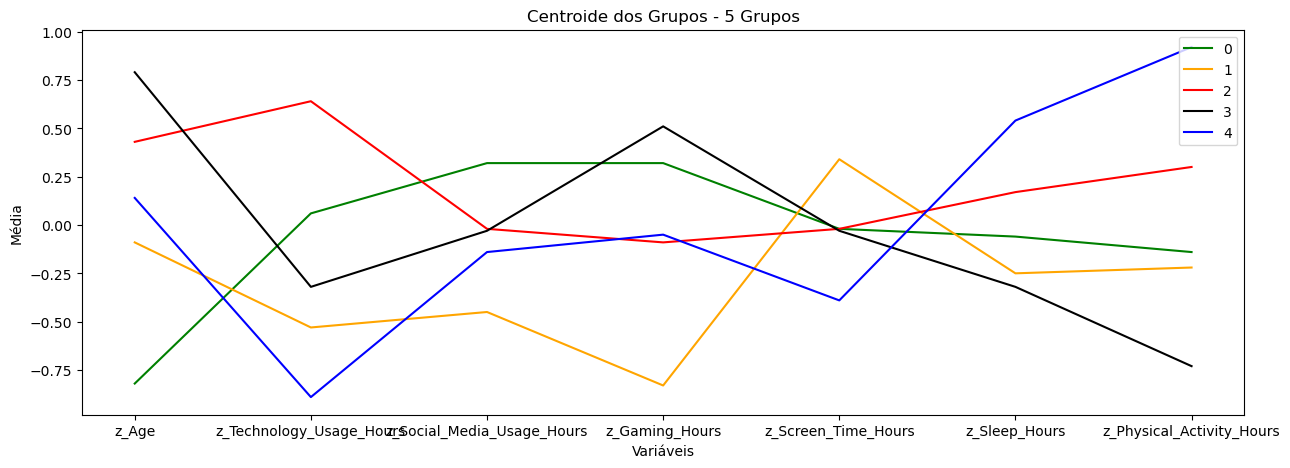

In [ ]:
# Gera um gráfico de linhas dos centros dos grupos
plt.figure(figsize=(15,5))
plt.plot(z_variaveis, grupo_5.loc[0], color='g')
plt.plot(z_variaveis, grupo_5.loc[1], color='orange')
plt.plot(z_variaveis, grupo_5.loc[2], color='red')
plt.plot(z_variaveis, grupo_5.loc[3], color='black')
plt.plot(z_variaveis, grupo_5.loc[4], color='blue')
plt.xlabel('Variáveis')
plt.ylabel('Média')
plt.title('Centroide dos Grupos - 5 Grupos')
plt.legend(["0","1","2","3","4"], loc=1)
plt.show()

Nessa divisão ainda existem 4 clusters que ultrapassam 10% da base, mas já se mostra uma opção mais interessante que a anterior, visto que a heterogeneidade entre os grupos aumentou, mas ainda entendemos que é possível distribuir melhor os elementos dentro dos clusters e diminuir o incremento de heterogeneidade dentro dos grupos, a partir da escolha de um número maior de dados, dado o tamanho desta base.

### 7 Grupos

In [ ]:
# Solução com 7 grupos, distância euclidiana quadrática e ligação completa (vizinho mais longe)
cluster = AgglomerativeClustering(n_clusters=7, metric='sqeuclidean', linkage='complete')  

In [ ]:
# Classificação de cada um dos 100 casos em um dos grupos (0,1 e 2)
cluster.fit_predict(df[z_variaveis])

array([2, 4, 4, ..., 2, 3, 0], dtype=int64)

In [ ]:
# Ajuste do agrupamento
cluster.fit(df[z_variaveis])

AgglomerativeClustering(linkage='complete', metric='sqeuclidean', n_clusters=7)

In [ ]:
# Parâmetros utilizados
cluster.get_params()

{'compute_distances': False,
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'complete',
 'memory': None,
 'metric': 'sqeuclidean',
 'n_clusters': 7}

In [ ]:
# Exibição dos grupos para cada um dos casos
cluster.labels_

array([2, 4, 4, ..., 2, 3, 0], dtype=int64)

In [ ]:
# Número de Casos
cluster.n_leaves_

10000

In [ ]:
# Número de clusters
cluster.n_clusters

7

In [ ]:
# Formação dos grupos - Aglomeração - Apresentação dos 5 primeiros passos.
cluster.children_[0:5]

array([[5104, 8311],
       [2861, 8655],
       [2502, 7268],
       [ 893, 7837],
       [2205, 7401]])

In [ ]:
# Acerescenta uma coluna no DataFrame informando em qual grupo cada indivíduo foi alocado
df = pd.concat([df, pd.DataFrame(cluster.fit_predict(df[z_variaveis]), columns=['grupo_7'])], axis=1)

In [ ]:
df.head(3)

,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,...,z_Technology_Usage_Hours,z_Social_Media_Usage_Hours,z_Gaming_Hours,z_Screen_Time_Hours,z_Sleep_Hours,z_Physical_Activity_Hours,mahalanobis_d2,grupo_3,grupo_5,grupo_7
0,USER-00001,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,...,0.030187,0.876421,-1.268838,1.084561,1.040263,0.587332,6.790576,1,0,2
1,USER-00002,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,...,-1.093244,-0.606123,0.846355,-0.090482,0.537113,0.301608,4.768009,2,4,4
2,USER-00003,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,...,-1.083777,0.936933,-0.867919,-1.191312,1.060940,1.654495,8.751142,2,4,4


In [ ]:
df.groupby('grupo_7').count()['User_ID']

grupo_7
0    1613
1    1908
2    2126
3    1407
4     924
5     854
6    1168
Name: User_ID, dtype: int64

In [ ]:
# Restringindo dataframe para apenas dados numericos
df_numerico = df.select_dtypes(include=['number'])

In [ ]:
# Calcula a média das variáveis utilizadas na segamentação por grupo e gera um DataFrame
grupo_7 = df_numerico.groupby('grupo_7').mean()[z_variaveis].round(2)

In [ ]:
grupo_7

,z_Age,z_Technology_Usage_Hours,z_Social_Media_Usage_Hours,z_Gaming_Hours,z_Screen_Time_Hours,z_Sleep_Hours,z_Physical_Activity_Hours
grupo_7,,,,,,,
0,-0.09,-0.53,-0.45,-0.83,0.34,-0.25,-0.22
1,0.49,0.59,-0.14,0.11,-0.24,-0.20,0.70
2,-0.77,0.15,0.73,0.20,0.01,0.03,0.05
3,0.79,-0.32,-0.03,0.51,-0.03,-0.32,-0.73
4,0.14,-0.89,-0.14,-0.05,-0.39,0.54,0.92
5,-0.94,-0.17,-0.72,0.63,-0.10,-0.27,-0.60
6,0.34,0.71,0.18,-0.42,0.33,0.78,-0.34


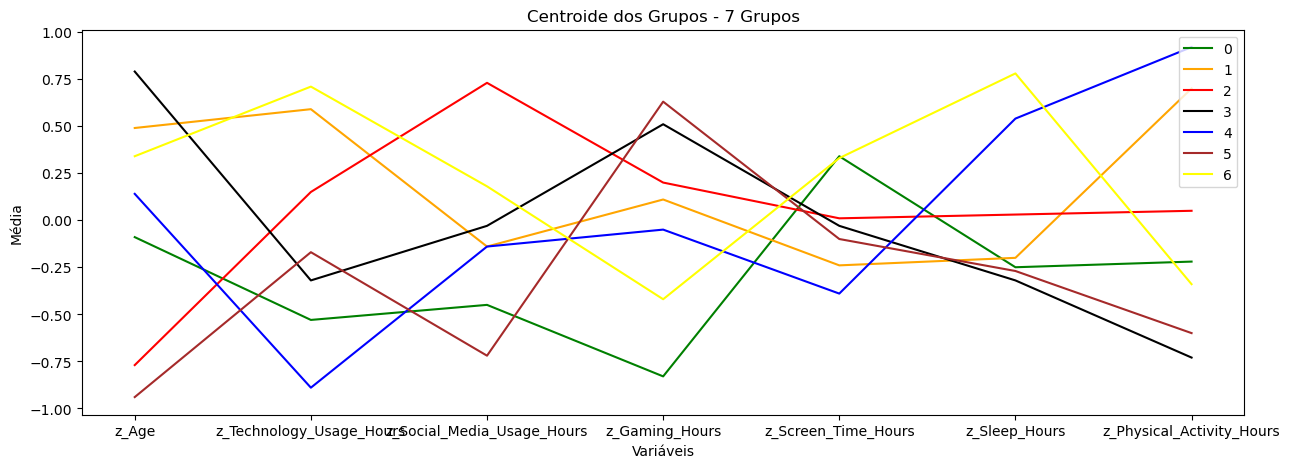

In [ ]:
# Gera um gráfico de linhas dos centros dos grupos
plt.figure(figsize=(15,5))
plt.plot(z_variaveis, grupo_7.loc[0], color='g')
plt.plot(z_variaveis, grupo_7.loc[1], color='orange')
plt.plot(z_variaveis, grupo_7.loc[2], color='red')
plt.plot(z_variaveis, grupo_7.loc[3], color='black')
plt.plot(z_variaveis, grupo_7.loc[4], color='blue')
plt.plot(z_variaveis, grupo_7.loc[5], color='Brown')
plt.plot(z_variaveis, grupo_7.loc[6], color='yellow')
plt.xlabel('Variáveis')
plt.ylabel('Média')
plt.title('Centroide dos Grupos - 7 Grupos')
plt.legend(["0","1","2","3","4","5","6"], loc=1)
plt.show()

A divisão em 7 clusters já se aproxima mais de uma escolha satisfatória na nossa visão, visto que há uma distribuição melhor dos indivíduos, além de uma boa heterogeneidade entre os grupos, o que se conclui a partir da observação do gráfico dos centroides dos grupos, em relação a cada variável envolvida na análise. Porém, ainda é possível se aproximar um pouco mais do objetivo principal da análise, que é a maximização da parecência dentro dos grupos e da heterogeneidade entre eles. 

### 10 Grupos

In [ ]:
# Solução com 10 grupos, distância euclidiana quadrática e ligação completa (vizinho mais longe)
cluster = AgglomerativeClustering(n_clusters=10, metric='sqeuclidean', linkage='complete')  

In [ ]:
# Classificação de cada um dos 100 casos em um dos grupos (0,1 e 2)
cluster.fit_predict(df[z_variaveis])

array([4, 0, 0, ..., 4, 1, 6], dtype=int64)

In [ ]:
# Ajuste do agrupamento
cluster.fit(df[z_variaveis])

AgglomerativeClustering(linkage='complete', metric='sqeuclidean', n_clusters=10)

In [ ]:
# Parâmetros utilizados
cluster.get_params()

{'compute_distances': False,
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'complete',
 'memory': None,
 'metric': 'sqeuclidean',
 'n_clusters': 10}

In [ ]:
# Exibição dos grupos para cada um dos casos
cluster.labels_

array([4, 0, 0, ..., 4, 1, 6], dtype=int64)

In [ ]:
# Número de Casos
cluster.n_leaves_

10000

In [ ]:
# Número de clusters
cluster.n_clusters

10

In [ ]:
# Formação dos grupos - Aglomeração - Apresentação dos 5 primeiros passos.
cluster.children_[0:5]

array([[5104, 8311],
       [2861, 8655],
       [2502, 7268],
       [ 893, 7837],
       [2205, 7401]])

In [ ]:
# Acerescenta uma coluna no DataFrame informando em qual grupo cada indivíduo foi alocado
df = pd.concat([df, pd.DataFrame(cluster.fit_predict(df[z_variaveis]), columns=['grupo_10'])], axis=1)

In [ ]:
df.head(3)

,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,...,z_Social_Media_Usage_Hours,z_Gaming_Hours,z_Screen_Time_Hours,z_Sleep_Hours,z_Physical_Activity_Hours,mahalanobis_d2,grupo_3,grupo_5,grupo_7,grupo_10
0,USER-00001,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,...,0.876421,-1.268838,1.084561,1.040263,0.587332,6.790576,1,0,2,4
1,USER-00002,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,...,-0.606123,0.846355,-0.090482,0.537113,0.301608,4.768009,2,4,4,0
2,USER-00003,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,...,0.936933,-0.867919,-1.191312,1.060940,1.654495,8.751142,2,4,4,0


In [ ]:
df.groupby('grupo_10').count()['User_ID']

grupo_10
0     924
1    1407
2    1168
3    1120
4    1005
5     854
6     993
7     620
8    1121
9     788
Name: User_ID, dtype: int64

In [ ]:
# Restringindo dataframe para apenas dados numericos
df_numerico = df.select_dtypes(include=['number'])

In [ ]:
# Calcula a média das variáveis utilizadas na segamentação por grupo e gera um DataFrame
grupo_10 = df_numerico.groupby('grupo_10').mean()[z_variaveis].round(2)

In [ ]:
grupo_10

,z_Age,z_Technology_Usage_Hours,z_Social_Media_Usage_Hours,z_Gaming_Hours,z_Screen_Time_Hours,z_Sleep_Hours,z_Physical_Activity_Hours
grupo_10,,,,,,,
0,0.14,-0.89,-0.14,-0.05,-0.39,0.54,0.92
1,0.79,-0.32,-0.03,0.51,-0.03,-0.32,-0.73
2,0.34,0.71,0.18,-0.42,0.33,0.78,-0.34
3,0.32,0.83,-0.76,-0.14,-0.22,-0.23,0.66
4,-0.76,-0.25,0.65,0.25,0.18,0.72,-0.13
5,-0.94,-0.17,-0.72,0.63,-0.10,-0.27,-0.60
6,-0.11,-0.56,-0.29,-0.81,0.84,-0.61,0.17
7,-0.05,-0.49,-0.70,-0.86,-0.47,0.31,-0.84
8,-0.77,0.51,0.81,0.15,-0.15,-0.59,0.21


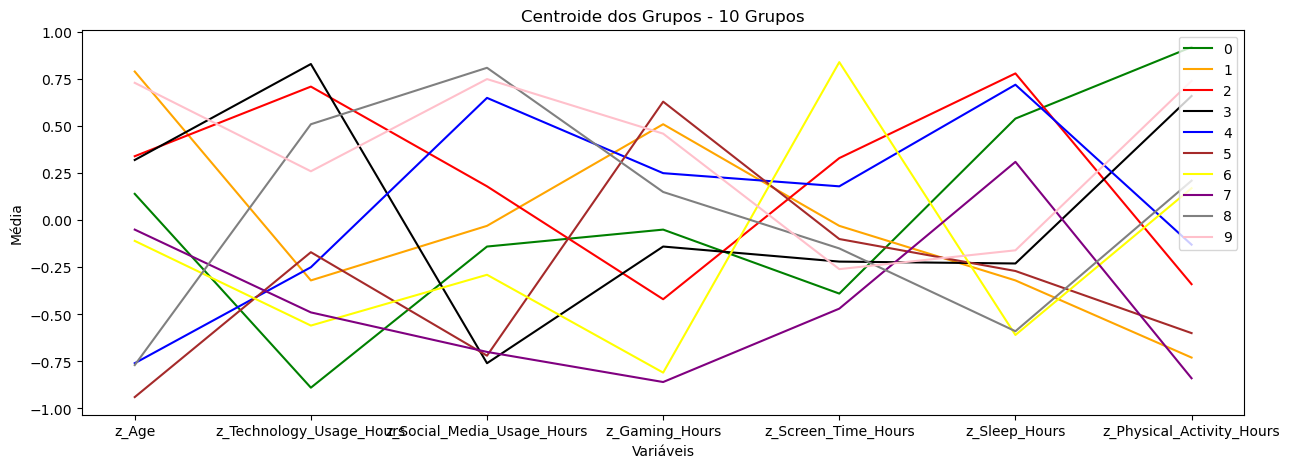

In [ ]:
# Gera um gráfico de linhas dos centros dos grupos
plt.figure(figsize=(15,5))
plt.plot(z_variaveis, grupo_10.loc[0], color='green')
plt.plot(z_variaveis, grupo_10.loc[1], color='orange')
plt.plot(z_variaveis, grupo_10.loc[2], color='red')
plt.plot(z_variaveis, grupo_10.loc[3], color='black')
plt.plot(z_variaveis, grupo_10.loc[4], color='blue')
plt.plot(z_variaveis, grupo_10.loc[5], color='Brown')
plt.plot(z_variaveis, grupo_10.loc[6], color='yellow')
plt.plot(z_variaveis, grupo_10.loc[7], color='purple')
plt.plot(z_variaveis, grupo_10.loc[8], color='gray')
plt.plot(z_variaveis, grupo_10.loc[9], color='pink')
plt.xlabel('Variáveis')
plt.ylabel('Média')
plt.title('Centroide dos Grupos - 10 Grupos')
plt.legend(["0","1","2","3","4","5","6","7","8","9"], loc=1)
plt.show()

A divisão em 10 grupos se mostra a mais adequada para o prosseguimento e realização da análise, visto que traz ótima distribuição dos indivíduos nos clusters, alto índice de heterogeneidade entre os grupos e dentre as opções escolhidas anteriormente, mostra a menor heterogeneidade dentro dos grupos, o que nos levou a escolher essa opção para prosseguir com a análise.

### K-Means - 10 grupos

In [ ]:
# Execução do algoritmo kmeans para 4 grupos e a semente dos centros é o centróide obtido na análise hierárquica
kmeans = KMeans(n_clusters=10, init=grupo_10, n_init=1).fit(df[z_variaveis])

In [ ]:
# Agrupa cada um dos elementos da amostra em um dos 4 grupos possíveis.
y_kmeans = kmeans.predict(df[z_variaveis])

In [ ]:
# Atribui o grupo para cada um dos casos no DataFrame
df['kmeans'] = kmeans.labels_

In [ ]:
df.head(10)

,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,...,z_Gaming_Hours,z_Screen_Time_Hours,z_Sleep_Hours,z_Physical_Activity_Hours,mahalanobis_d2,grupo_3,grupo_5,grupo_7,grupo_10,kmeans
0,USER-00001,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,...,-1.268838,1.084561,1.040263,0.587332,6.790576,1,0,2,4,4
1,USER-00002,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,...,0.846355,-0.090482,0.537113,0.301608,4.768009,2,4,4,0,4
2,USER-00003,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,...,-0.867919,-1.191312,1.060940,1.654495,8.751142,2,4,4,0,0
3,USER-00004,25,Female,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,...,0.051430,1.262673,-0.607036,0.095060,4.139608,1,0,5,5,4
4,USER-00005,53,Male,1.20,0.56,0.29,12.63,Good,Low,5.55,...,-1.538422,1.151353,-0.655283,-0.345575,9.690050,2,1,0,6,6
5,USER-00006,58,Male,5.59,5.74,0.11,1.34,Poor,Low,8.61,...,-1.662845,-1.641539,1.453810,0.528810,10.050396,0,2,6,2,0
6,USER-00007,63,Female,3.38,2.55,3.79,9.78,Excellent,Medium,8.61,...,0.880917,0.446327,1.453810,-1.261269,8.378242,2,1,0,7,1
7,USER-00008,51,Female,7.18,4.10,4.74,8.14,Excellent,Medium,7.11,...,1.537595,0.040628,0.419941,0.091618,3.031282,0,2,1,9,9
8,USER-00009,57,Other,10.86,4.11,0.08,6.02,Fair,Medium,7.19,...,-1.683582,-0.483812,0.475081,0.074405,6.546379,0,2,1,3,3
9,USER-00010,31,Other,4.30,7.23,0.81,6.87,Excellent,High,5.09,...,-1.178977,-0.273541,-0.972336,-1.560764,7.914367,1,0,2,4,7


In [ ]:
# Quantidade de casos por grupo
df.groupby('kmeans').count()['User_ID']

kmeans
0    1032
1    1115
2    1048
3     932
4     812
5    1079
6    1120
7     972
8     985
9     905
Name: User_ID, dtype: int64

Perante o k-means, é possível observarmos que os grupos estão balanceados adequadamente, considerando que a variação máxima de número de observações por cluster é 308, sendo o cluster com mais observação tendo 1120 e o menor 812. Com isso, conclui-se que há uma baixa probabilidade de haver outliers na análise.

In [ ]:
df_numerico = df.select_dtypes(include=['number'])

In [ ]:
# Gera o centroide final dos grupos.
k_means_centro = df_numerico.groupby('kmeans').mean()[z_variaveis].round(2)

In [ ]:
k_means_centro

,z_Age,z_Technology_Usage_Hours,z_Social_Media_Usage_Hours,z_Gaming_Hours,z_Screen_Time_Hours,z_Sleep_Hours,z_Physical_Activity_Hours
kmeans,,,,,,,
0,0.29,-0.80,0.05,0.02,-0.76,0.68,0.94
1,0.73,-0.57,-0.31,0.77,-0.42,-0.36,-0.89
2,0.55,0.58,0.79,-0.64,0.46,0.67,-0.65
3,0.27,0.96,-0.69,-0.70,-0.76,-0.40,0.36
4,-0.87,-0.79,0.78,0.71,0.70,0.18,0.14
5,-0.35,0.43,-1.04,0.54,0.73,0.62,0.02
6,-0.09,-0.57,-0.30,-0.89,0.84,-0.78,0.46
7,-0.63,-0.64,-0.19,-0.86,-0.68,0.23,-0.91
8,-0.98,0.80,0.59,0.51,-0.61,-0.41,-0.04


De acordo com os centroides dos clusters é possível percebermos algumas características específicas dos clusters como: 
 - O cluster 9 tem uma idade mais avançada.
 - O cluster 3 tem o maior uso de tecnologia.
 - Os clusters 2 e 4 tem a maior média de uso de redes sociais.
 - O cluster 1 tem o maior uso de consoles e computadores quando se trata de jogar.
 - O cluster 6 tem o maior tempo de frente a telas como celulares, computadores, tablets entre outros.
 - Os clusters 0 e 2 possuem a maior quantidade de horas dormidas perante as avaliações dos outros clusters.
 - O cluster 0 tem maior pratica de exercícios físicos.

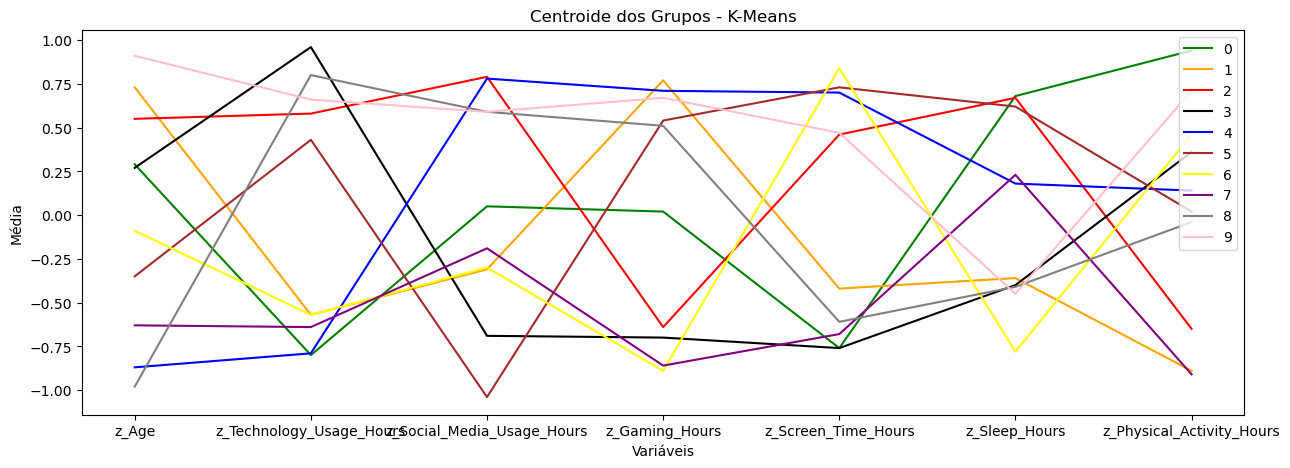

In [ ]:
# Gera um gráfico de linhas dos centros dos grupos - KMeans

plt.figure(figsize=(15,5))
plt.plot(z_variaveis, k_means_centro.loc[0], color='green')
plt.plot(z_variaveis, k_means_centro.loc[1], color='orange')
plt.plot(z_variaveis, k_means_centro.loc[2], color='red')
plt.plot(z_variaveis, k_means_centro.loc[3], color='black')
plt.plot(z_variaveis, k_means_centro.loc[4], color='blue')
plt.plot(z_variaveis, k_means_centro.loc[5], color='Brown')
plt.plot(z_variaveis, k_means_centro.loc[6], color='yellow')
plt.plot(z_variaveis, k_means_centro.loc[7], color='purple')
plt.plot(z_variaveis, k_means_centro.loc[8], color='gray')
plt.plot(z_variaveis, k_means_centro.loc[9], color='pink')
plt.xlabel('Variáveis')
plt.ylabel('Média')
plt.title('Centroide dos Grupos - K-Means')
plt.legend(["0","1","2", "3","4","5","6","7","8","9"], loc=1)
plt.show()

### Centro dos grupos

In [ ]:
clusters_labels = pd.DataFrame(kmeans.labels_)
clusters_labels = clusters_labels.drop_duplicates().sort_values(0)

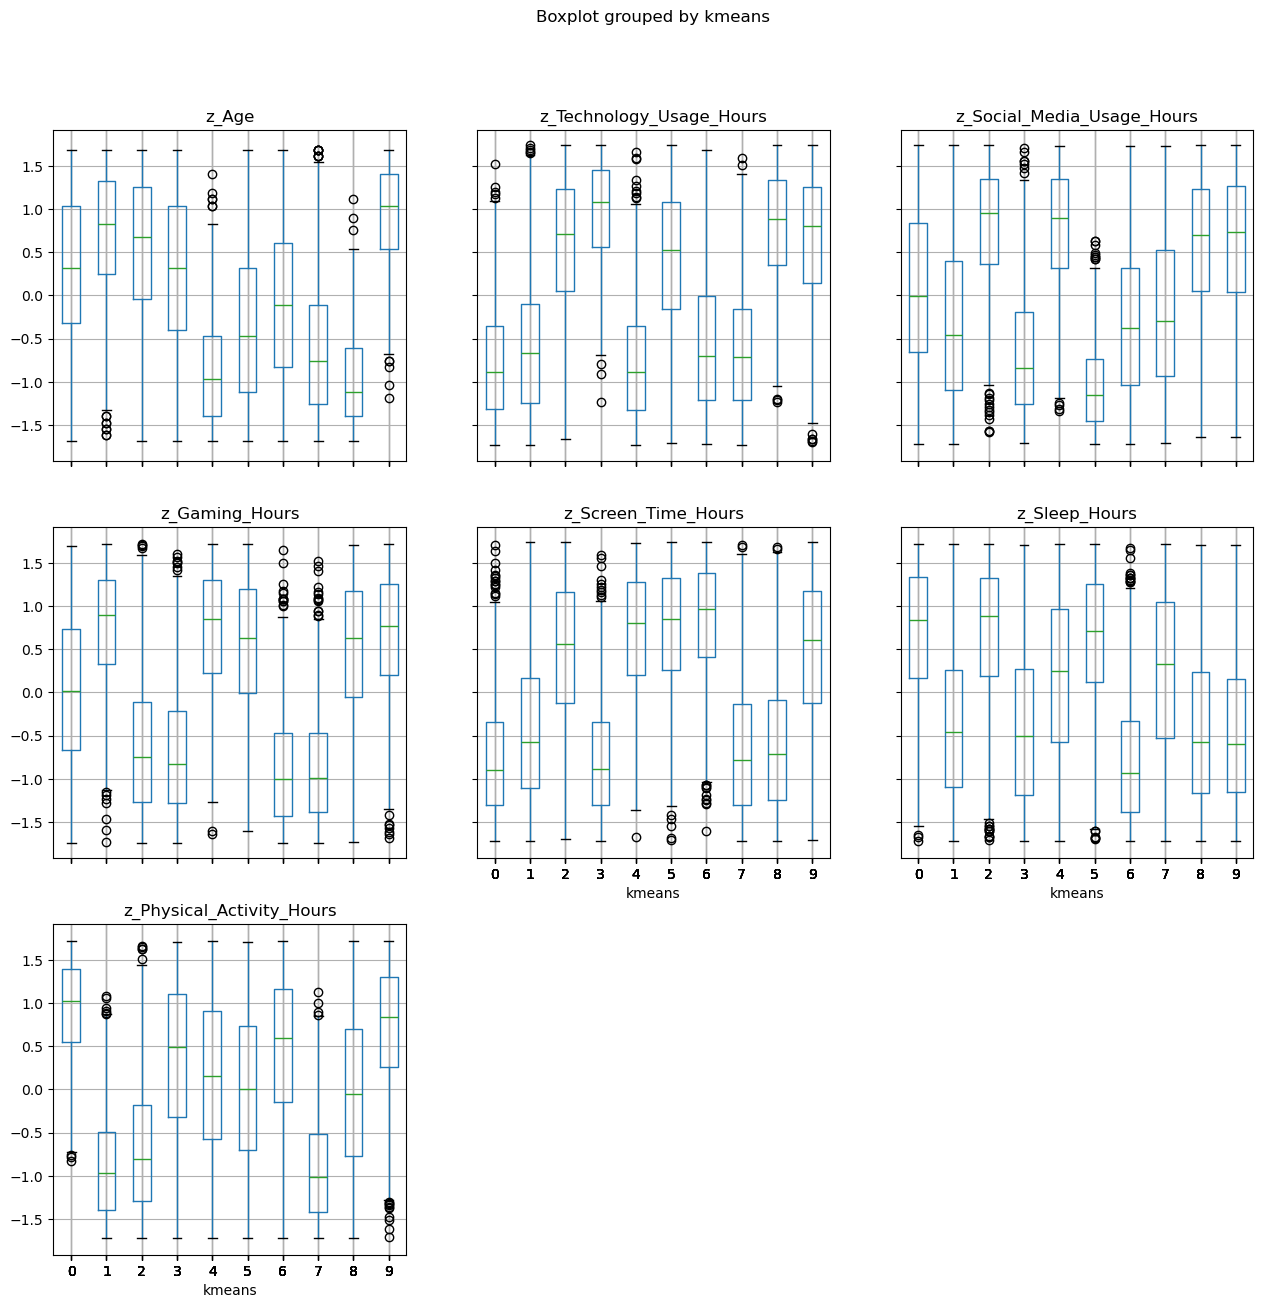

In [ ]:
# Boxplot das variáveis originais por grupos.
boxplot = df.boxplot(column=z_variaveis, by='kmeans', layout=(3,3), figsize=[15,15], showfliers=True)
plt.show()

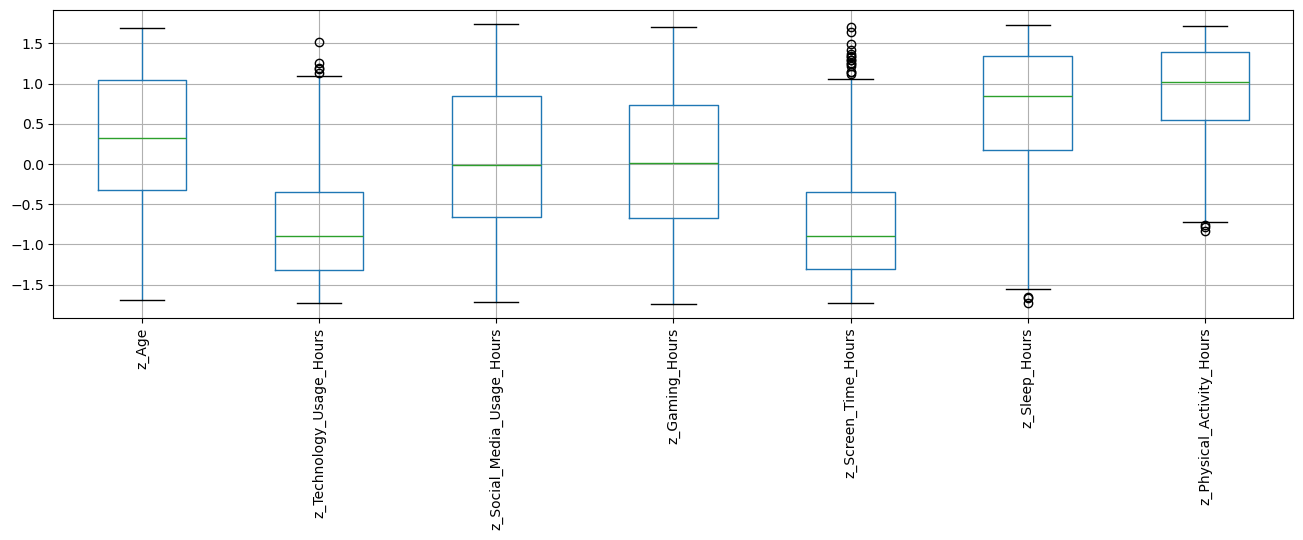

In [ ]:
# Boxplot do kmeans cluster 1 das variáveis
df_0 = df.loc[df['kmeans'] == 0]
ax = df_0[z_variaveis].boxplot(showfliers=True, figsize=[16,4], rot=90)
plt.show()

No primeiro adicione depois do ponto final "É possível enxergar alguns outliers nas variáveis uso da tecnologia, tempo de tela, tempo de sono e prática de atividades físicas, o que indica que uma parcela pequena do grupo não segue a tendência do mesmo, tendo pessoas com um alto conhecimento e uso das tecnologias modernas, pessoas com um índice de tempo de frente a telas muito elevado, pessoas com poucas horas dormindo e pessoas que praticam exercício físico mas em uma intensidade muito menor que o padrão do grupo.

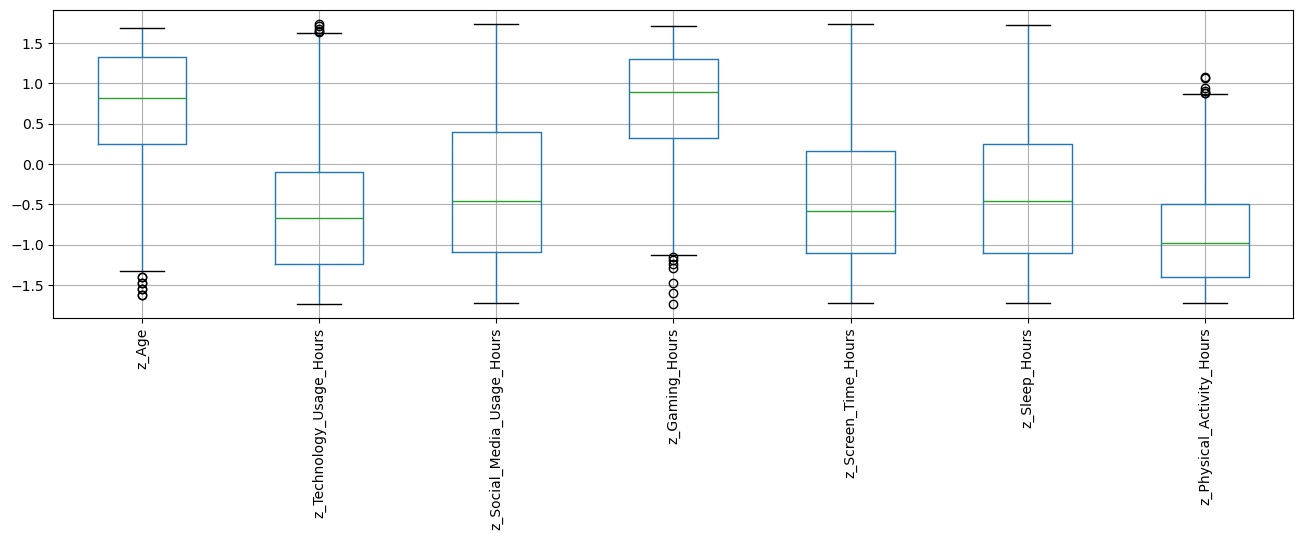

In [ ]:
# Boxplot do kmeans cluster 2 das variáveis
df_0 = df.loc[df['kmeans'] == 1]
ax = df_0[z_variaveis].boxplot(showfliers=True, figsize=[16,4], rot=90)
plt.show()

No segundo adicione depois do ponto final "É possível enxergar alguns outliers nas variáveis idade, uso de tecnologia, tempo jogando e prática de atividades físicas, o que indica que uma parcela pequena do grupo não segue a tendência do mesmo, tendo pessoas com a idade muito menor que o padrão do grupo, pessoas com um elevado conhecimento e uso da tecnologia, pessoas que não possuem o hábito de jogarem e pessoas que praticam exercícios físicos em um quantidade satisfatória.

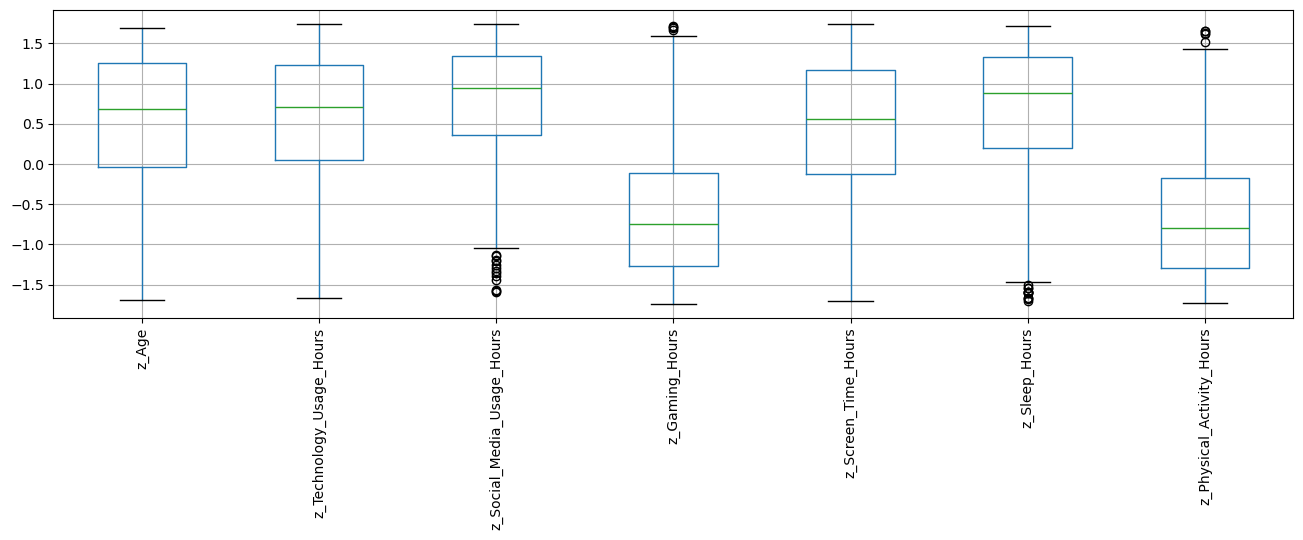

In [ ]:
# Boxplot do kmeans cluster 3 das variáveis
df_0 = df.loc[df['kmeans'] == 2]
ax = df_0[z_variaveis].boxplot(showfliers=True, figsize=[16,4], rot=90)
plt.show()

No terceiro adicione depois do ponto final "É possível enxergar alguns outliers nas variáveis uso de redes sociais, tempo jogando, horas de sono e prática de atividades físicas, o que indica que uma parcela pequena do grupo não segue a tendência do mesmo, tendo pessoas com um uso muito baixo de redes sociais, pessoas com alto índice de horas jogando, pessoas que dormem muito pouco e pessoas que ocupam grande parte do seu dia realizando exercícios físicos.

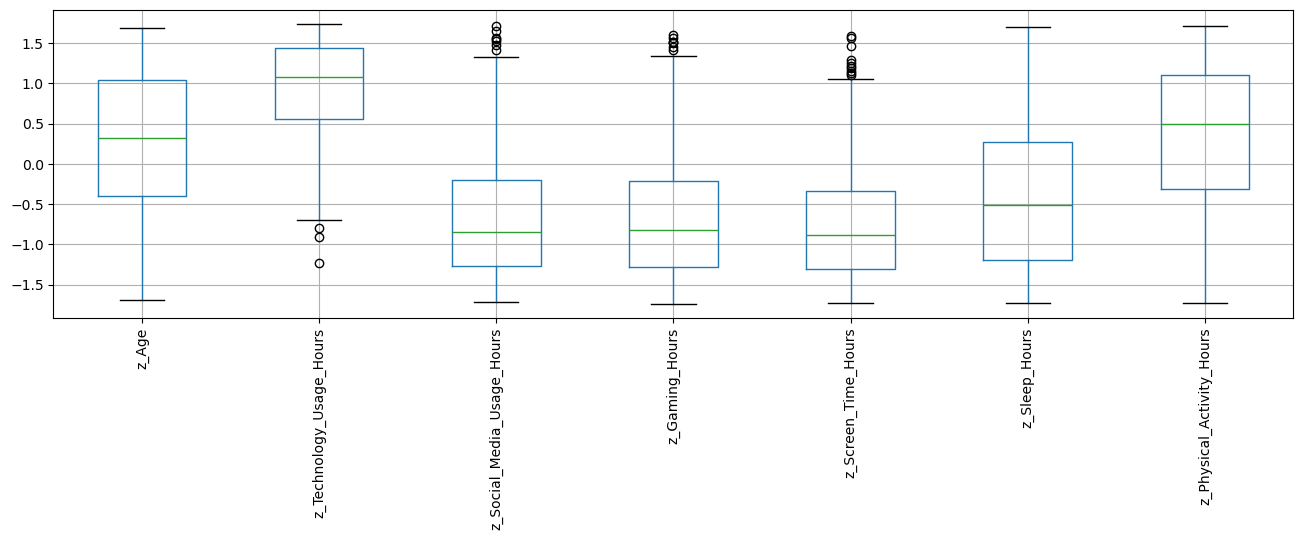

In [ ]:
# Boxplot do kmeans cluster 4 das variáveis
df_0 = df.loc[df['kmeans'] == 3]
ax = df_0[z_variaveis].boxplot(showfliers=True, figsize=[16,4], rot=90)
plt.show()

No quarto adicione depois do ponto final "É possível enxergar alguns outliers nas variáveis  uso de tecnologia, uso de redes sociais, tempo jogando e tempo de tela, o que indica que uma parcela pequena do grupo não segue a tendência do mesmo, tendo pessoas com baixo conhecimento sobre tecnologia, pessoas com um elevado uso diário de redes sociais, de jogos e de frente a telas.

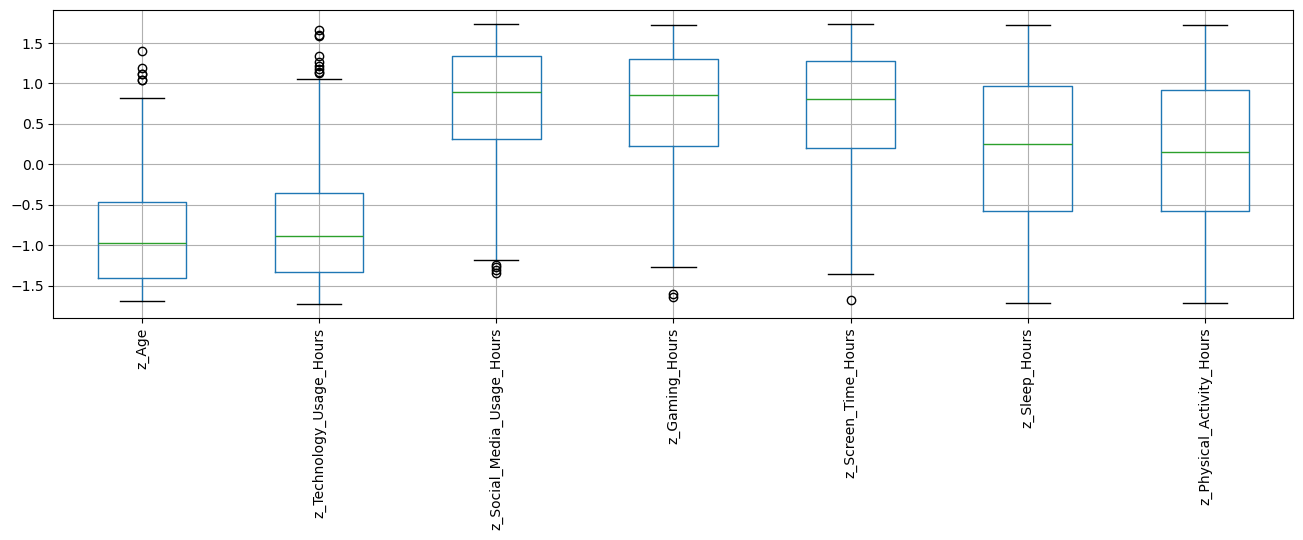

In [ ]:
# Boxplot do kmeans cluster 5 das variáveis
df_0 = df.loc[df['kmeans'] == 4]
ax = df_0[z_variaveis].boxplot(showfliers=True, figsize=[16,4], rot=90)
plt.show()

No quinto adicione depois do ponto final "É possível enxergar alguns outliers nas variáveis idade, uso de tecnologia, uso de redes sociais, tempo jogando e tempo de tela, o que indica que uma parcela pequena do grupo não segue a tendência do mesmo, tendo pessoas com idades mais avançadas no grupo, pessoas que dominam muito bem a tecnologia, pessoas com pouco uso das redes sociais e algumas pessoas que não possuem o hábito de jogarem.

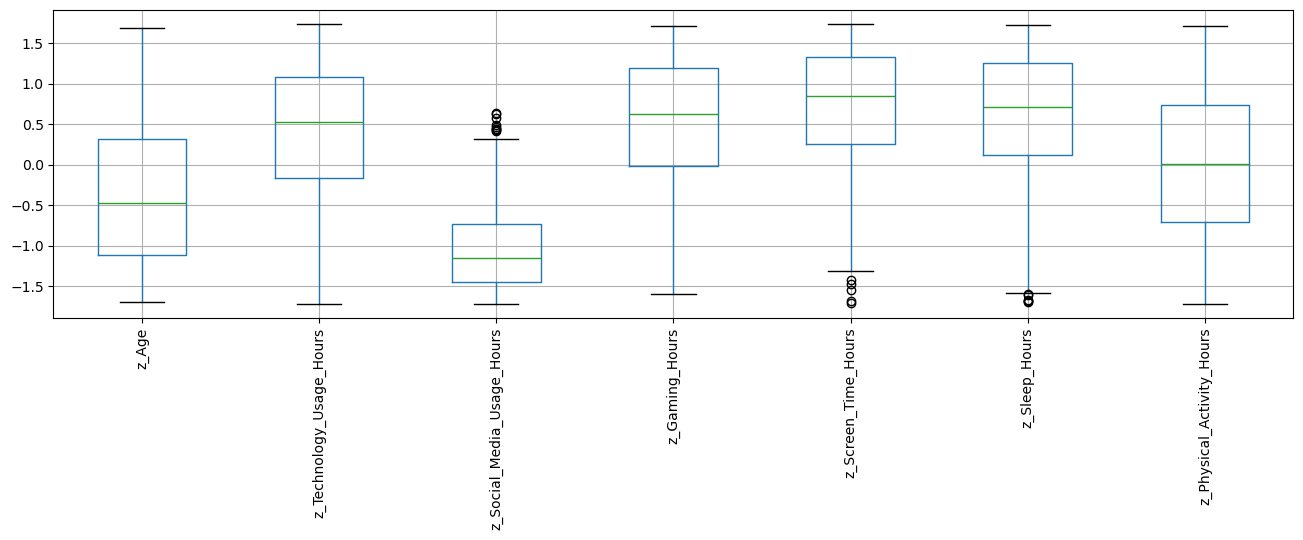

In [ ]:
# Boxplot do kmeans cluster 6 das variáveis
df_0 = df.loc[df['kmeans'] == 5]
ax = df_0[z_variaveis].boxplot(showfliers=True, figsize=[16,4], rot=90)
plt.show()

No sexto adicione depois do ponto final "É possível enxergar alguns outliers nas variáveis uso de redes sociais, tempo de tela e horas de sono, o que indica que uma parcela pequena do grupo não segue a tendência do mesmo, tendo pessoas com um tempo médio de uso diário nas redes sociais bem maior, pessoas que utilizam muito pouco das telas em gerais e pessoas que dormem poucas horas por dia.

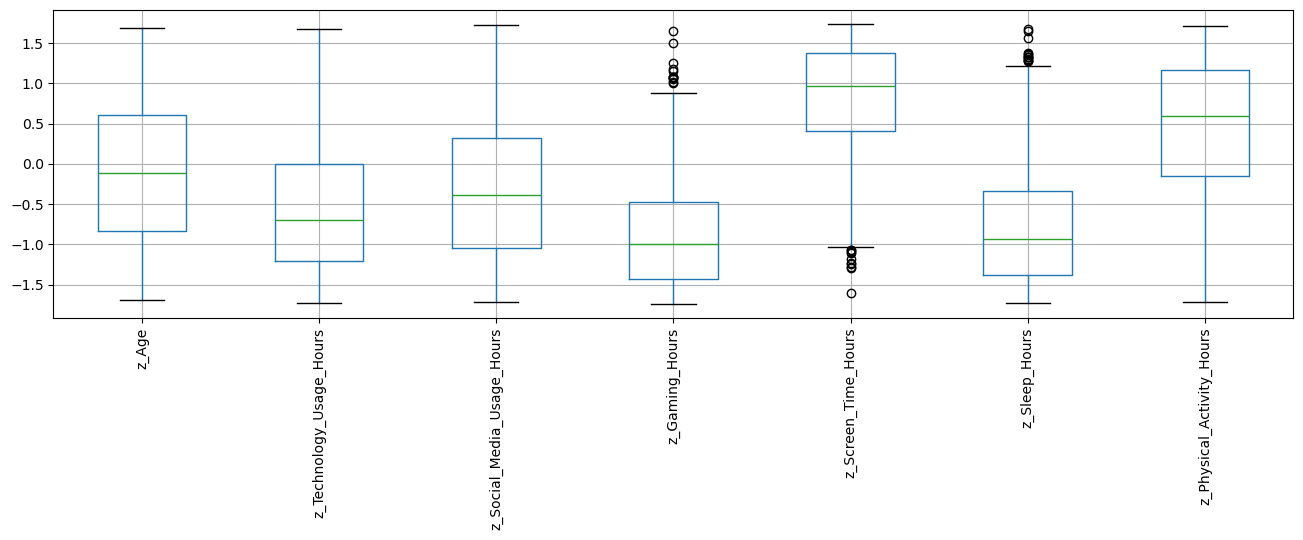

In [ ]:
# Boxplot do kmeans cluster 7 das variáveis
df_0 = df.loc[df['kmeans'] == 6]
ax = df_0[z_variaveis].boxplot(showfliers=True, figsize=[16,4], rot=90)
plt.show()

No sétimo adicione depois do ponto final "É possível enxergar alguns outliers nas variáveis tempo jogando, tempo de tela e horas de sono, o que indica que uma parcela pequena do grupo não segue a tendência do mesmo, tendo pessoas com rotinas mais voltadas aos games, pessoas com muito menos tempo em telas como telefone, computador ou televisão e pessoas com uma quantidade maior de horas de sono por dia.

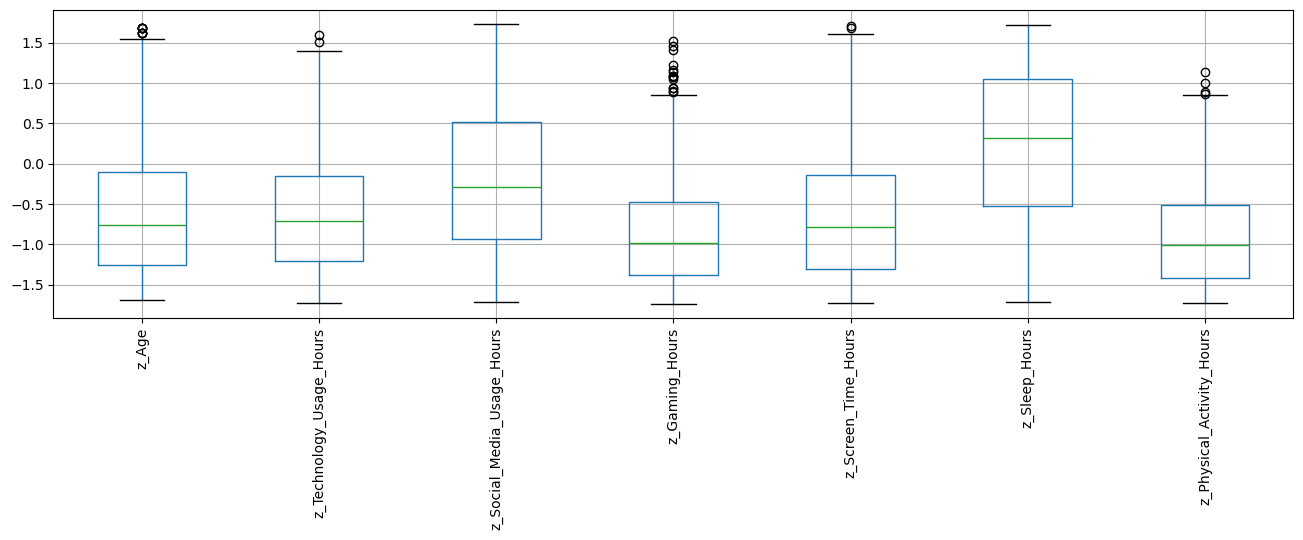

In [ ]:
# Boxplot do kmeans cluster 8 das variáveis
df_0 = df.loc[df['kmeans'] == 7]
ax = df_0[z_variaveis].boxplot(showfliers=True, figsize=[16,4], rot=90)
plt.show()

De acordo com o boxplot do oitavo cluster observa-se uma tendência alta para a variável horas de sono, uma tendência mediana para uso de redes sociais e uma tendência baixa para idade, uso de tecnologia, horas jogando, tempo de tela e a pratica de atividade física, isso indica que esse cluster é repleto de observações de pessoas muito jovens em fase de crescimento, o que explica a alta na variável de sono, com pouco conhecimento de tecnologia e o uso da mesma, única variável com uma tendência mediana relacionada a tecnologia seria a de uso de redes sociais, o que indicaria crianças muito presentes em aplicativos como instagram e whatsapp, podendo considerar serem alguns deles filhos de influenciadores. É possível enxergar alguns outliers nas variáveis idade, uso da tecnologia, tempo jogando, tempo de tela e tempo gasto com atividades físicas, o que indica que uma parcela pequena do grupo não segue a tendência do mesmo, tendo como principais outliers na variável tempo jogando.

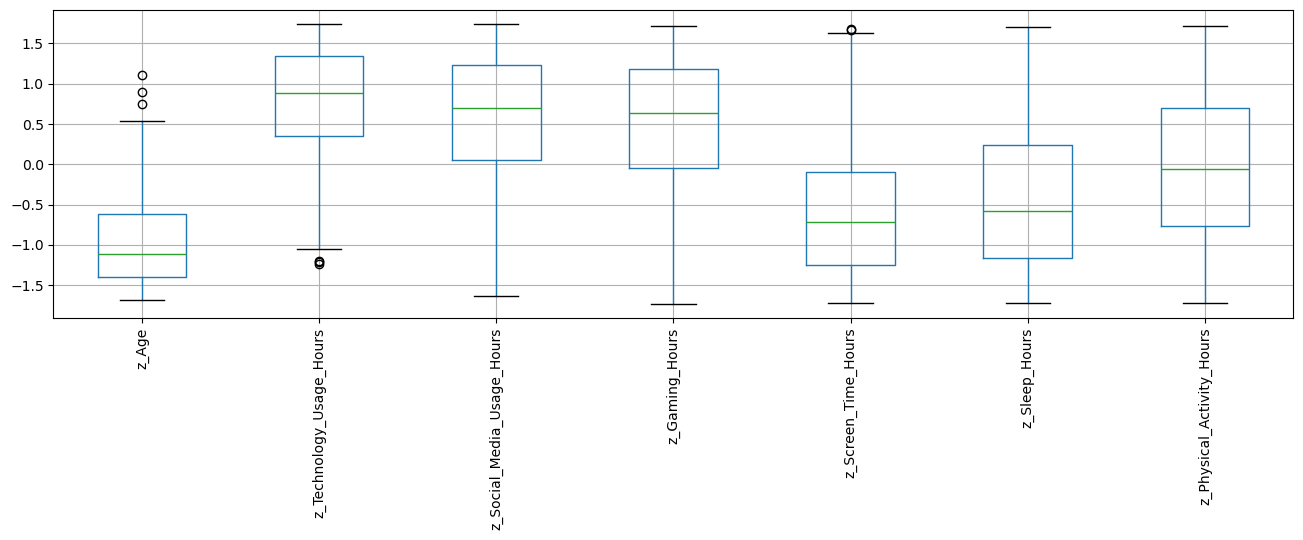

In [ ]:
# Boxplot do kmeans cluster 9 das variáveis
df_0 = df.loc[df['kmeans'] == 8]
ax = df_0[z_variaveis].boxplot(showfliers=True, figsize=[16,4], rot=90)
plt.show()

De acordo com o boxplot do nono cluster observa-se uma tendência alta para a variável uso da tecnologia, uso de redes sociais e tempo jogando, uma tendência mediana para tempo de sono e a pratica de atividades físicas e uma tendência baixa para idade e tempo de tela, isso indica que esse cluster é repleto de observações de pessoas mais jovens, provavelmente youtubers ou streamers, ou mesmo pessoas que sigam a rotina desse pessoal. É possível enxergar alguns outliers nas variáveis idade, uso da tecnologia e tempo de tela, o que indica que uma parcela pequena do grupo não segue a tendência do mesmo, tendo pessoas mais velhas, pessoas que não dominam tão bem a tecnologia moderna e pessoas com um tempo de tela exurberante.

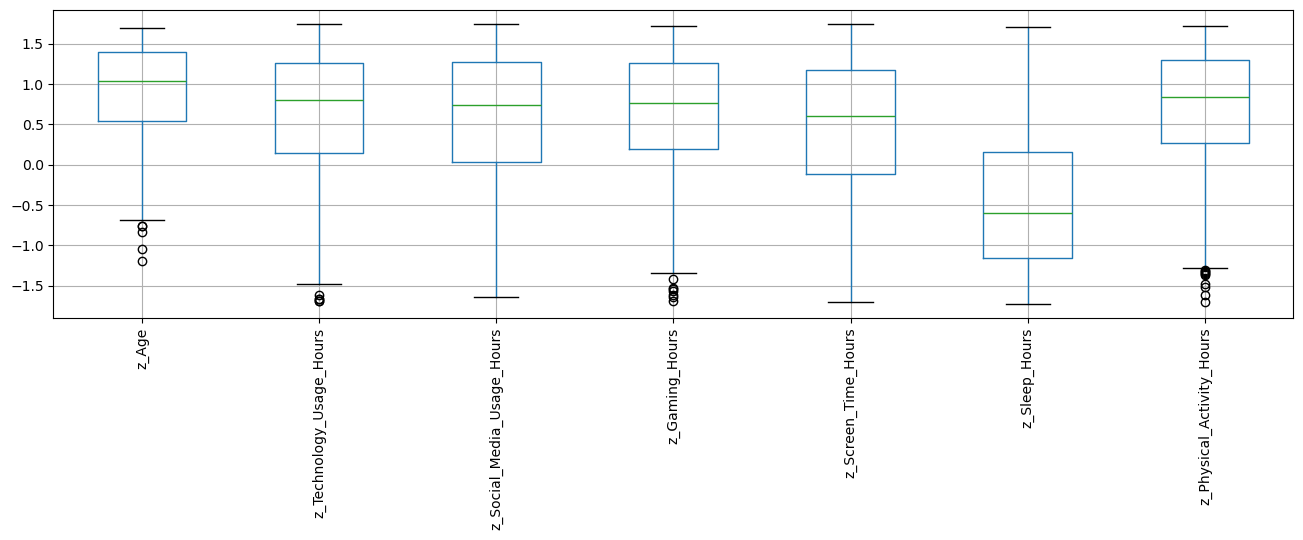

In [ ]:
# Boxplot do kmeans cluster 10 das variáveis
df_0 = df.loc[df['kmeans'] == 9]
ax = df_0[z_variaveis].boxplot(showfliers=True, figsize=[16,4], rot=90)
plt.show()

De acordo com o boxplot do décimo cluster observa-se uma tendência alta para a variável idade, uso da tecnologia, uso de redes sociais, tempo jogando, tempo de tela e a pratica de atividade física e uma tendência mediana para tempo de sono, isso indica que esse cluster é repleto de pessoas mais idosas, com alto conhecimento em tecnologia em geral, que ficam muito tempo no smartphone e computadores, tanto nas redes sociais quanto jogando, mas que independente do tempo gasto com as atividades anteriores, não deixa de cuidar da saúde praticando exercício físico. É possível enxergar alguns outliers nas variáveis idade, uso de tecnologia, tempo jogando e tempo em atividade físicas, o que indica que uma parcela pequena do grupo não segue a tendência do mesmo, tendo pessoas mais jovens, ou que não joguem muito, ou que não praticam exercício físico.

### Anova

In [ ]:
rs.summary_cont(df[z_variaveis[0]].groupby(df['kmeans']))

,N,Mean,SD,SE,95% Conf.,Interval
kmeans,,,,,,
0,1032,0.2862,0.8716,0.0271,0.2329,0.3394
1,1115,0.7287,0.7269,0.0218,0.6860,0.7714
2,1048,0.5517,0.8148,0.0252,0.5023,0.6011
3,932,0.2694,0.8849,0.0290,0.2125,0.3263
4,812,-0.8693,0.6269,0.0220,-0.9125,-0.8261
5,1079,-0.3467,0.8764,0.0267,-0.3990,-0.2943
6,1120,-0.0911,0.9256,0.0277,-0.1453,-0.0368
7,972,-0.6305,0.7807,0.0250,-0.6797,-0.5814
8,985,-0.9805,0.5447,0.0174,-1.0146,-0.9465


In [ ]:
rs.summary_cont(df[z_variaveis[1]].groupby(df['kmeans']))

,N,Mean,SD,SE,95% Conf.,Interval
kmeans,,,,,,
0,1032,-0.7962,0.6464,0.0201,-0.8357,-0.7567
1,1115,-0.5701,0.7870,0.0236,-0.6163,-0.5238
2,1048,0.5779,0.7959,0.0246,0.5297,0.6262
3,932,0.9622,0.5812,0.0190,0.9248,0.9995
4,812,-0.7877,0.6666,0.0234,-0.8337,-0.7418
5,1079,0.4320,0.8095,0.0246,0.3837,0.4804
6,1120,-0.5650,0.7892,0.0236,-0.6113,-0.5188
7,972,-0.6399,0.7107,0.0228,-0.6846,-0.5951
8,985,0.8015,0.6544,0.0208,0.7606,0.8424


In [ ]:
rs.summary_cont(df[z_variaveis[2]].groupby(df['kmeans']))

,N,Mean,SD,SE,95% Conf.,Interval
kmeans,,,,,,
0,1032,0.0495,0.9283,0.0289,-0.0072,0.1062
1,1115,-0.3104,0.9170,0.0275,-0.3643,-0.2565
2,1048,0.7903,0.6948,0.0215,0.7482,0.8324
3,932,-0.6902,0.7305,0.0239,-0.7372,-0.6432
4,812,0.7823,0.6769,0.0238,0.7356,0.8289
5,1079,-1.0383,0.5095,0.0155,-1.0687,-1.0079
6,1120,-0.2993,0.8848,0.0264,-0.3512,-0.2475
7,972,-0.1908,0.9211,0.0295,-0.2488,-0.1328
8,985,0.5868,0.7739,0.0247,0.5384,0.6351


In [ ]:
rs.summary_cont(df[z_variaveis[3]].groupby(df['kmeans']))

,N,Mean,SD,SE,95% Conf.,Interval
kmeans,,,,,,
0,1032,0.0230,0.8978,0.0279,-0.0318,0.0779
1,1115,0.7681,0.6656,0.0199,0.7290,0.8072
2,1048,-0.6357,0.7766,0.0240,-0.6827,-0.5886
3,932,-0.6992,0.7266,0.0238,-0.7459,-0.6525
4,812,0.7146,0.7180,0.0252,0.6651,0.7640
5,1079,0.5401,0.7658,0.0233,0.4944,0.5859
6,1120,-0.8902,0.6444,0.0193,-0.9280,-0.8525
7,972,-0.8637,0.6457,0.0207,-0.9043,-0.8230
8,985,0.5110,0.7970,0.0254,0.4612,0.5608


In [ ]:
rs.summary_cont(df[z_variaveis[4]].groupby(df['kmeans']))

,N,Mean,SD,SE,95% Conf.,Interval
kmeans,,,,,,
0,1032,-0.7596,0.6931,0.0216,-0.8020,-0.7173
1,1115,-0.4226,0.8502,0.0255,-0.4726,-0.3726
2,1048,0.4650,0.8411,0.0260,0.4140,0.5160
3,932,-0.7617,0.6846,0.0224,-0.8057,-0.7177
4,812,0.7029,0.7003,0.0246,0.6547,0.7511
5,1079,0.7338,0.7180,0.0219,0.6909,0.7767
6,1120,0.8401,0.6620,0.0198,0.8013,0.8789
7,972,-0.6758,0.7278,0.0233,-0.7216,-0.6299
8,985,-0.6051,0.7737,0.0247,-0.6535,-0.5568


In [ ]:
rs.summary_cont(df[z_variaveis[5]].groupby(df['kmeans']))

,N,Mean,SD,SE,95% Conf.,Interval
kmeans,,,,,,
0,1032,0.6833,0.7878,0.0245,0.6352,0.7314
1,1115,-0.3577,0.8970,0.0269,-0.4104,-0.3049
2,1048,0.6703,0.8237,0.0254,0.6203,0.7202
3,932,-0.4030,0.8782,0.0288,-0.4595,-0.3465
4,812,0.1836,0.9430,0.0331,0.1187,0.2486
5,1079,0.6237,0.7718,0.0235,0.5776,0.6698
6,1120,-0.7792,0.7217,0.0216,-0.8215,-0.7368
7,972,0.2339,0.9399,0.0301,0.1748,0.2931
8,985,-0.4051,0.8964,0.0286,-0.4612,-0.3491


In [ ]:
rs.summary_cont(df[z_variaveis[6]].groupby(df['kmeans']))

,N,Mean,SD,SE,95% Conf.,Interval
kmeans,,,,,,
0,1032,0.9352,0.5572,0.0173,0.9011,0.9692
1,1115,-0.8912,0.6036,0.0181,-0.9267,-0.8558
2,1048,-0.6495,0.7654,0.0236,-0.6959,-0.6031
3,932,0.3603,0.8692,0.0285,0.3044,0.4162
4,812,0.1372,0.9336,0.0328,0.0729,0.2015
5,1079,0.0202,0.9107,0.0277,-0.0342,0.0746
6,1120,0.4591,0.8566,0.0256,0.4089,0.5093
7,972,-0.9081,0.5993,0.0192,-0.9459,-0.8704
8,985,-0.0364,0.9242,0.0294,-0.0942,0.0214


In [ ]:
print(f"{'Variável':<10}{'QMC':>10}{'df1':>10}{'QME':>10}{'df2':>10}{'F':>10}{'p-valor':>10}\n")
for i in range(len(z_variaveis)):
    formula = z_variaveis[i] + '~ C(kmeans)'
    model = ols(formula, df).fit()
    aov_table = pd.DataFrame(stm.stats.anova.anova_lm(model, typ=1))
    print(f"{z_variaveis[i]:<10}{'{:.3f}'.format(aov_table.iloc[0,2].round(3)):>10}{'{:.0f}'.format(aov_table.iloc[0,0].round()):>10}\
{'{:.3f}'.format(aov_table.iloc[1,2].round(3)):>10}{'{:.0f}'.format(aov_table.iloc[1,0].round()):>10} \
{'{:.3f}'.format(aov_table.iloc[0,3].round(3)):>10}{'{:.3f}'.format(aov_table.iloc[0,4].round(3)):>10}") 

Variável         QMC       df1       QME       df2         F   p-valor

z_Age        433.183         9     0.611      9990    709.267     0.000
z_Technology_Usage_Hours   523.610         9     0.529      9990    989.286     0.000
z_Social_Media_Usage_Hours   407.021         9     0.634      9990    641.669     0.000
z_Gaming_Hours   504.995         9     0.546      9990    924.815     0.000
z_Screen_Time_Hours   482.322         9     0.566      9990    851.443     0.000
z_Sleep_Hours   308.358         9     0.723      9990    426.379     0.000
z_Physical_Activity_Hours   429.483         9     0.614      9990    699.392     0.000


In [ ]:
from tabulate import tabulate

tabela = []

for var in z_variaveis:
    formula = f"{var} ~ C(kmeans)"
    model = ols(formula, df).fit()
    aov_table = pd.DataFrame(stm.stats.anova.anova_lm(model, typ=1))

    qmc = aov_table.iloc[0, 2]
    df1 = aov_table.iloc[0, 0]
    qme = aov_table.iloc[1, 2]
    df2 = aov_table.iloc[1, 0]
    f_val = aov_table.iloc[0, 3]
    p_val = aov_table.iloc[0, 4]

    tabela.append([
        var, round(qmc, 3), int(df1), round(qme, 3), int(df2), round(f_val, 3), round(p_val, 3)
    ])

# Cabeçalhos
headers = ['Variável', 'QMC', 'df1', 'QME', 'df2', 'F', 'p-valor']

# Impressão da tabela alinhada
print(tabulate(tabela, headers=headers, tablefmt="github"))


| Variável                   |     QMC |   df1 |   QME |   df2 |       F |   p-valor |
|----------------------------|---------|-------|-------|-------|---------|-----------|
| z_Age                      | 433.183 |     9 | 0.611 |  9990 | 709.267 |         0 |
| z_Technology_Usage_Hours   | 523.61  |     9 | 0.529 |  9990 | 989.286 |         0 |
| z_Social_Media_Usage_Hours | 407.021 |     9 | 0.634 |  9990 | 641.669 |         0 |
| z_Gaming_Hours             | 504.995 |     9 | 0.546 |  9990 | 924.815 |         0 |
| z_Screen_Time_Hours        | 482.322 |     9 | 0.566 |  9990 | 851.443 |         0 |
| z_Sleep_Hours              | 308.358 |     9 | 0.723 |  9990 | 426.379 |         0 |
| z_Physical_Activity_Hours  | 429.483 |     9 | 0.614 |  9990 | 699.392 |         0 |


As variáveis relacionadas ao uso de tecnologia, como horas de uso de tecnologia, jogos e tempo de tela, são as que mais influenciam na separação dos grupos. Isso sugere que os padrões de comportamento digital são fortes indicadores para classificar os indivíduos nesses agrupamentos. Porém, variáveis como horas de sono ou atividade física têm menor poder de discriminação, embora ainda sejam estatisticamente relevantes.

## Considerações Finais

A presente análise teve como objetivo identificar possíveis agrupamentos de indivíduos com comportamentos semelhantes em relação ao uso de tecnologia, sono e atividade física. Foram utilizados diferentes números de clusters (5, 7 e 10), até a escolha de 10 clusters, com base em variáveis previamente padronizadas e considerando a distância euclidiana como medida de similaridade. A segmentação permitiu observar distintos perfis dentro da base de dados, oferecendo uma visão exploratória sobre padrões de comportamento entre os respondentes. Embora os agrupamentos não tenham apresentado separações claramente definidas ou facilmente interpretáveis, a análise forneceu subsídios iniciais que podem contribuir para futuras investigações ou ajustes metodológicos mais específicos.